Sources:
https://prastuti.medium.com/twitter-sentiment-analysis-on-covid-19-using-vader-82f030b686a9
https://github.com/cjhutto/vaderSentiment
https://www.justintodata.com/twitter-sentiment-analysis-python/


In [57]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px



Extracting first tweets for sentiment analysis

In [3]:
tweetsDf = pd.read_csv("twitterDataOutput.csv")
print("dataframe shape: " + str(tweetsDf.shape) )

tweetsDf.head

dataframe shape: (448740, 3)


<bound method NDFrame.head of                             date                   id  \
0       2022-05-31T23:14:24.000Z  1531776135083720711   
1       2022-05-31T22:17:29.000Z  1531761813922136065   
2       2022-05-31T22:09:18.000Z  1531759753071845376   
3       2022-05-31T22:05:43.000Z  1531758850273050626   
4       2022-05-31T22:04:05.000Z  1531758441521467395   
...                          ...                  ...   
448735  2019-01-01T00:20:15.000Z  1079895037868232704   
448736  2019-01-01T00:19:16.000Z  1079894793583509507   
448737  2019-01-01T00:18:55.000Z  1079894704504913920   
448738  2019-01-01T00:16:20.000Z  1079894051745382410   
448739  2019-01-01T00:14:27.000Z  1079893578829230081   

                                                    tweet  
0       @FilipinoFollies It’s outdated. 3rd has negati...  
1       A Japan song title feeling very topical at the...  
2       @FurnaceFear @Jo_dB Although it cuts off befor...  
3       #Bradford is trending on @Twitter!   

In [5]:
def cleanTweet(tweet):
    # remove mentions
    cleanTweet = re.sub("(@[A-Za-z0-9_]+)","", tweet)
    # remove urls
    cleanTweet = re.sub("https?://[A-Za-z0-9./]*","", cleanTweet)
    # remove whitespaces
    cleanTweet = ' '.join(cleanTweet.split())
    # replace '&amp;' with 'and'
    cleanTweet = re.sub("&amp;", "and", cleanTweet)
    return cleanTweet

In [6]:
tweetsDf['cleanTweet'] = tweetsDf['tweet'].apply(lambda x:cleanTweet(x))

In [7]:
pd. set_option('display.max_rows', 10)
pd. set_option('display.max_columns', None)
pd. set_option('display.width', None)
pd. set_option('display.max_colwidth', None)
tweetsDf

,date,id,tweet,cleanTweet
0,2022-05-31T23:14:24.000Z,1531776135083720711,"@FilipinoFollies It’s outdated. 3rd has negative connotations like the Philippines is somehow in 3rd place, Filipinos are in fact winning, at least those Filipinos who are not negative like yourself sir.","It’s outdated. 3rd has negative connotations like the Philippines is somehow in 3rd place, Filipinos are in fact winning, at least those Filipinos who are not negative like yourself sir."
1,2022-05-31T22:17:29.000Z,1531761813922136065,A Japan song title feeling very topical at the moment. So is the B-side unfortunately. https://t.co/OkAqdLGwxH,A Japan song title feeling very topical at the moment. So is the B-side unfortunately.
2,2022-05-31T22:09:18.000Z,1531759753071845376,"@FurnaceFear @Jo_dB Although it cuts off before my favourite line from Adolf Martin 'and you see, I think it all started going wrong when the Japanese arrived....'","Although it cuts off before my favourite line from Adolf Martin 'and you see, I think it all started going wrong when the Japanese arrived....'"
3,2022-05-31T22:05:43.000Z,1531758850273050626,#Bradford is trending on @Twitter! We have been waiting for #CityofCulture2025 It's our place &amp; our time @FoxandWindmill the UK's first indie publisher for British South Asians is based right here in #Bradford and we'll always back our beautiful city as proud Bradfordians🦊 https://t.co/5bg3y8tXaN,#Bradford is trending on ! We have been waiting for #CityofCulture2025 It's our place and our time the UK's first indie publisher for British South Asians is based right here in #Bradford and we'll always back our beautiful city as proud Bradfordians🦊
4,2022-05-31T22:04:05.000Z,1531758441521467395,This was a light day in Vietnam back in my World At War days during game chat. Sorry Kat. https://t.co/BHYEVC7jyL,This was a light day in Vietnam back in my World At War days during game chat. Sorry Kat.
...,...,...,...,...
448735,2019-01-01T00:20:15.000Z,1079895037868232704,"Buy our oriental rugs on-line or visit our shop in the historic market town Olney, Buckinghamshire where there is so much more to see! Visit https://t.co/biDiyKXjqF for more information. #OlneyRugs, #AreaRug, #HandKnotted, #IranianRugs, #RectangleRugs","Buy our oriental rugs on-line or visit our shop in the historic market town Olney, Buckinghamshire where there is so much more to see! Visit for more information. #OlneyRugs, #AreaRug, #HandKnotted, #IranianRugs, #RectangleRugs"
448736,2019-01-01T00:19:16.000Z,1079894793583509507,So I'm at my parents house and someone has let off one of those chinese lanterns (picture isnt very clear) https://t.co/RwfcGMuwtj,So I'm at my parents house and someone has let off one of those chinese lanterns (picture isnt very clear)
448737,2019-01-01T00:18:55.000Z,1079894704504913920,"Goodbye 2018 it was a great year but here's to an even more fabulous 2019 #kualalumpur #dubai #macau #china #paris #london #rydercup #illinoistech #chicago @ Cambridge, Cambridgeshire https://t.co/mixLaM9O7S","Goodbye 2018 it was a great year but here's to an even more fabulous 2019 #kualalumpur #dubai #macau #china #paris #london #rydercup #illinoistech #chicago @ Cambridge, Cambridgeshire"
448738,2019-01-01T00:16:20.000Z,1079894051745382410,@Queen_UK Yes Ma’m... That display in Singapore looked more like an ejaculation than a firework display. One didn’t know where to look for embarrassment! But glad to hear you had a good bang! Happy New Year! Xx,Yes Ma’m... That display in Singapore looked more like an ejaculation than a firework display. One didn’t know where to look for embarrassment! But glad to hear you had a good bang! Happy New Year! Xx


In [8]:
# carrying out sentiment analysis using VADER on each cleanTweet
analyzer = SentimentIntensityAnalyzer()
tweetsDf['scores'] = tweetsDf['cleanTweet'].apply(lambda x: analyzer.polarity_scores(x))

In [9]:
# assinging a label: positive, negative, or neutral
def labelSentiment(scoreDictionary):
    compoundScore = scoreDictionary['compound']
    if compoundScore >= 0.05:
        return "positive"
    elif compoundScore <= -0.05:
        return "negative"
    else:
        return "neutral"

In [10]:
tweetsDf['label'] = tweetsDf['scores'].apply(lambda x: labelSentiment(x))

In [11]:
positiveTweets = tweetsDf[tweetsDf['label'] == 'positive']
negativeTweets = tweetsDf[tweetsDf['label'] == 'negative']
neutralTweets = tweetsDf[tweetsDf['label'] == 'neutral']

print("number of positive tweets: " + str(positiveTweets.shape[0]))
print("number of negative tweets: " + str(negativeTweets.shape[0]))
print("number of neutral tweets: " + str(neutralTweets.shape[0]))

number of positive tweets: 229643
number of negative tweets: 118449
number of neutral tweets: 100648


[Text(0.5, 1.0, 'Number of positive, negative, and neutral tweets')]

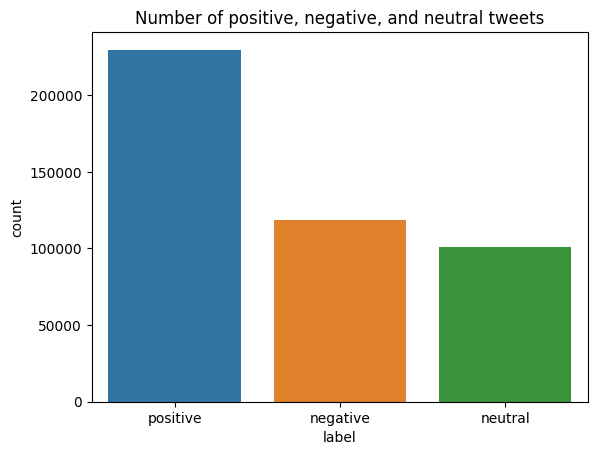

In [12]:
sns.countplot(x=tweetsDf['label'], label= 'count').set(title='Number of positive, negative, and neutral tweets')

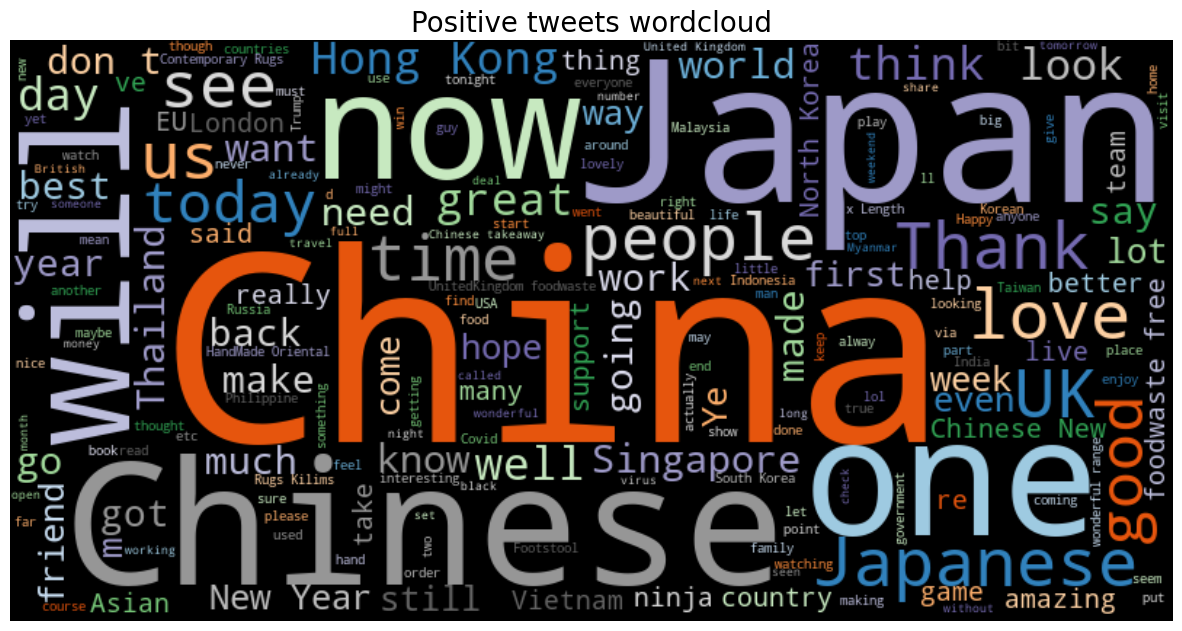

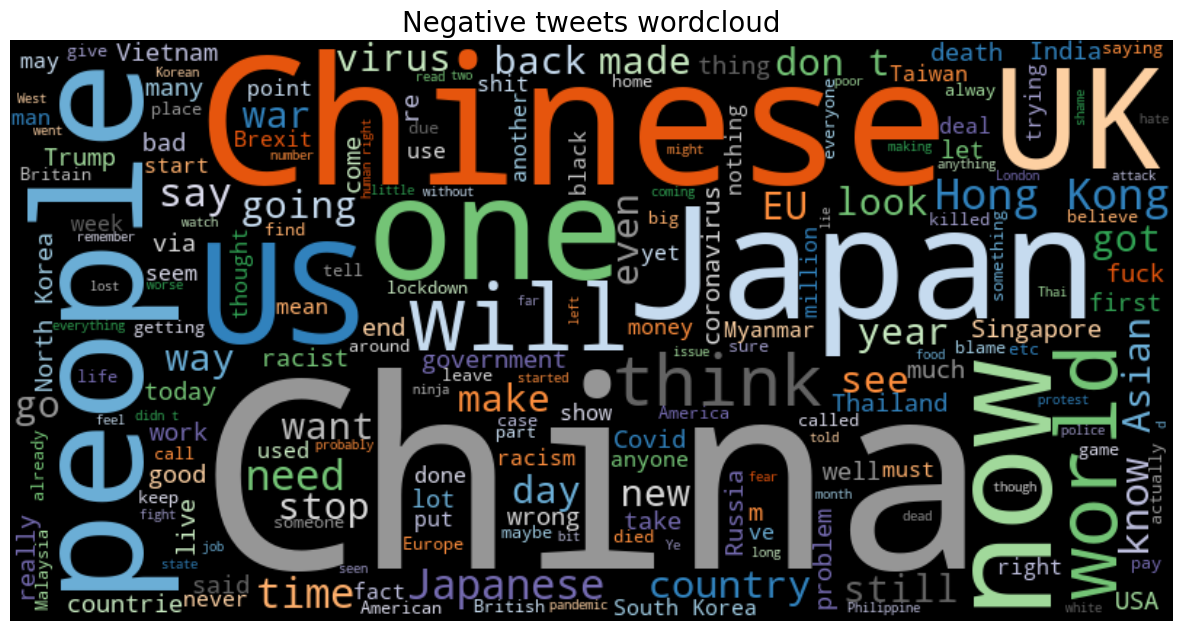

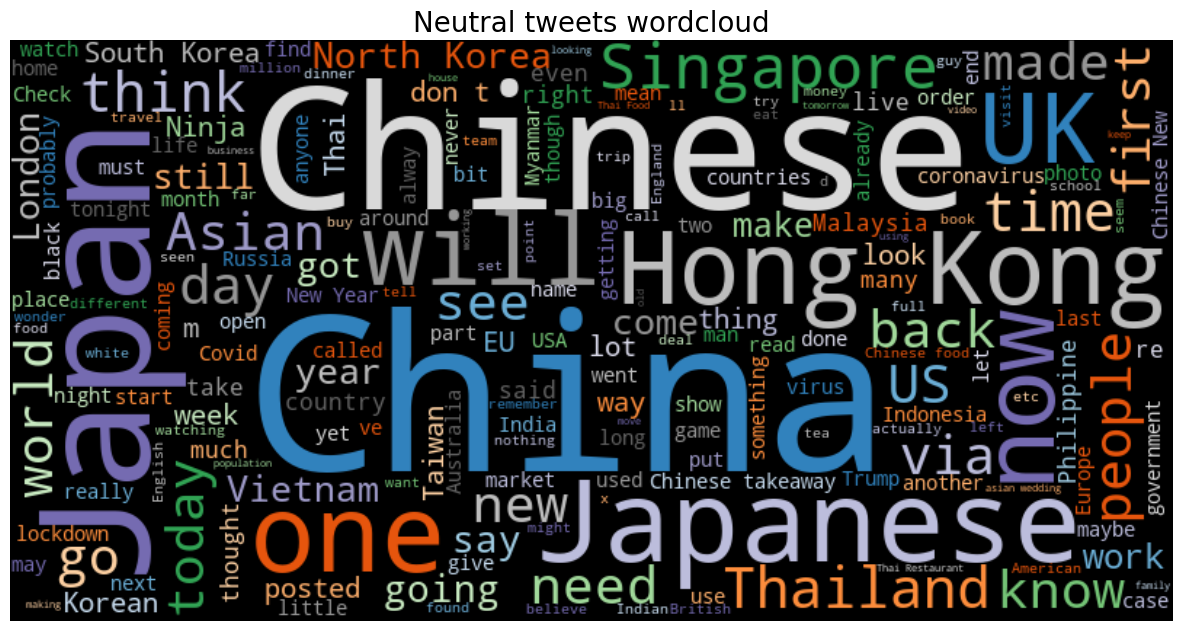

In [56]:
stops = set(STOPWORDS)
stops.add("U")
stops.add("S")

def tweetsDfToWC(df, title):
    tweets_list = df['cleanTweet'].tolist()
    tweets_string = " ".join(tweets_list)
    wc = WordCloud(width=800, height=400, background_color='black', colormap='tab20c', stopwords=stops).generate(tweets_string)
    plt.figure(figsize = (15,15))
    plt.title(title, fontsize = 20)
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
   
tweetsDfToWC(positiveTweets, "Positive tweets wordcloud")
tweetsDfToWC(negativeTweets, "Negative tweets wordcloud")
tweetsDfToWC(neutralTweets, "Neutral tweets wordcloud")
    


In [15]:
def floorDate(dateString):
    shortDateStr = dateString[:10]
    shortDateFormat = "%Y-%m-%d"
    return datetime.strptime(shortDateStr, shortDateFormat)

tweetsDf['day'] = tweetsDf['date'].apply(lambda x: floorDate(x))

In [16]:
aggregate = {'cnt': ('id', 'count')}
sentimentOverTimeDf = tweetsDf.groupby(['day', 'label']).agg(**aggregate).reset_index()
sentimentOverTimeDf


,day,label,cnt
0,2019-01-01,negative,107
1,2019-01-01,neutral,87
2,2019-01-01,positive,226
3,2019-01-02,negative,102
4,2019-01-02,neutral,128
...,...,...,...
3736,2022-05-30,neutral,55
3737,2022-05-30,positive,107
3738,2022-05-31,negative,50
3739,2022-05-31,neutral,52


In [30]:
fig = px.line(sentimentOverTimeDf, x='day', y='cnt', color='label', title = "VADER sentiment analysis of UK-based Asia-related tweets Jan 2019 - Jun 2022", 

labels={
                     "day": "Date",
                     "cnt": "Number of tweets"
                 },
             color_discrete_map={ # replaces default color mapping by value
                "negative":  '#EF553B', "neutral": '#FECB52', "positive": '#00CC96'
            }
)
           
fig.show()